### Retailrocket Wide & Deep Learning for Recommender
#### https://www.kaggle.com/code/realshivanshverma/retailrocket-wide-deep-learning-for-recommender/input
#### https://www.kaggle.com/datasets/retailrocket/ecommerce-dataset/data



## 1. LOAD DATA

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("retailrocket/ecommerce-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/ecommerce-dataset


In [ ]:
import pandas as pd

In [ ]:
# Define file paths
category_tree_path = "/kaggle/input/ecommerce-dataset/category_tree.csv"
events_path = "/kaggle/input/ecommerce-dataset/events.csv"
item_properties_path1 = "/kaggle/input/ecommerce-dataset/item_properties_part1.csv"
item_properties_path2 = "/kaggle/input/ecommerce-dataset/item_properties_part2.csv"

# Read input files
category_tree = pd.read_csv(category_tree_path)
events = pd.read_csv(events_path)
item_properties1 = pd.read_csv(item_properties_path1)
item_properties2 = pd.read_csv(item_properties_path2)

In [ ]:
print("Category tree shape:", category_tree.shape)
print("Events shape:", events.shape)
print("Item properties (part1) shape:", item_properties1.shape)
print("Item properties (part2) shape:", item_properties2.shape)


Category tree shape: (1669, 2)
Events shape: (2756101, 5)
Item properties (part1) shape: (10999999, 4)
Item properties (part2) shape: (9275903, 4)


## 2. EXPLORATORY DATA ANALYSIS (EDA)¶


In [ ]:
item_props = pd.concat([item_properties1, item_properties2], axis=0, ignore_index=True)
print("Merged item_props shape:", item_props.shape)


Merged item_props shape: (20275902, 4)


In [ ]:
# 3.2 Quick Glance at the Data
print("\nEvents head:")
display(events.head())
print("\nItem Props head:")
display(item_props.head())
print("\nCategory Tree head:")
display(category_tree.head())


Events head:


,timestamp,visitorid,event,itemid,transactionid
0,1433221332117,257597,view,355908,NaN
1,1433224214164,992329,view,248676,NaN
2,1433221999827,111016,view,318965,NaN
3,1433221955914,483717,view,253185,NaN
4,1433221337106,951259,view,367447,NaN



Item Props head:


,timestamp,itemid,property,value
0,1435460400000,460429,categoryid,1338
1,1441508400000,206783,888,1116713 960601 n277.200
2,1439089200000,395014,400,n552.000 639502 n720.000 424566
3,1431226800000,59481,790,n15360.000
4,1431831600000,156781,917,828513



Category Tree head:


,categoryid,parentid
0,1016,213.0
1,809,169.0
2,570,9.0
3,1691,885.0
4,536,1691.0


### Events Dataset
### Basic Info, Null Values, Unique Values

In [ ]:
# Basic info
print("=== EVENTS DATASET EXPLORATION ===\n")
print("1. Basic Info")
events.info()

# Null values
print("\n2. Null Values per Column:")
print(events.isnull().sum())

# Percentage of null values
print("\n3. Percentage of Null Values per Column:")
print((events.isnull().sum() / events.shape[0]) * 100)

# Unique values in each column
print("\n4. Unique Value Counts per Column:")
for col_name in events.columns:
    unique_vals = events[col_name].nunique()
    print(f"  {col_name}: {unique_vals}")

=== EVENTS DATASET EXPLORATION ===

1. Basic Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2756101 entries, 0 to 2756100
Data columns (total 5 columns):
 #   Column         Dtype  
---  ------         -----  
 0   timestamp      int64  
 1   visitorid      int64  
 2   event          object 
 3   itemid         int64  
 4   transactionid  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 105.1+ MB

2. Null Values per Column:
timestamp              0
visitorid              0
event                  0
itemid                 0
transactionid    2733644
dtype: int64

3. Percentage of Null Values per Column:
timestamp         0.00000
visitorid         0.00000
event             0.00000
itemid            0.00000
transactionid    99.18519
dtype: float64

4. Unique Value Counts per Column:
  timestamp: 2750455
  visitorid: 1407580
  event: 3
  itemid: 235061
  transactionid: 17672


#### Distribution of Event Types

=== Distribution of Event Types ===
event
view           2664312
addtocart        69332
transaction      22457
Name: count, dtype: int64


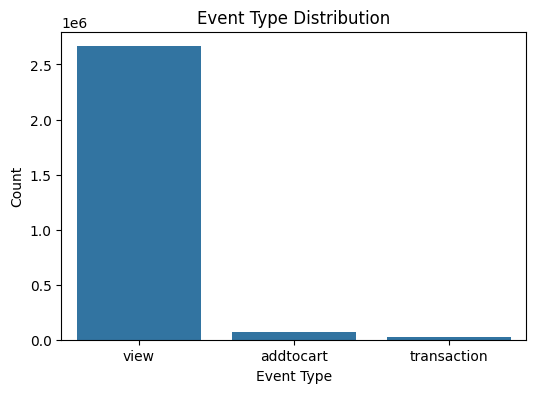

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of 'event' column
print("=== Distribution of Event Types ===")
event_counts = events['event'].value_counts()
print(event_counts)

# Visualize with a countplot
plt.figure(figsize=(6,4))
sns.countplot(x='event', data=events, order=event_counts.index)
plt.title("Event Type Distribution")
plt.xlabel("Event Type")
plt.ylabel("Count")
plt.show()


#### User-Level Analysis

In [ ]:
# Group by visitorid to see how many events each user performed
user_event_counts = events.groupby('visitorid')['event'].count()
print("=== User-Level Analysis ===")
print("Distribution of events per user:")
print(user_event_counts.describe())

user_event_counts.value_counts()


=== User-Level Analysis ===
Distribution of events per user:
count    1.407580e+06
mean     1.958042e+00
std      1.258049e+01
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      7.757000e+03
Name: event, dtype: float64


,count
event,
1,1001560
2,205992
3,79612
4,38796
5,22967
...,...
400,1
229,1
554,1


#### Item-Level Analysis

In [ ]:
# Group by itemid to see how many events each item has
item_event_counts = events.groupby('itemid')['event'].count()
print("=== Item-Level Analysis ===")
print("Distribution of events per item:")
print(item_event_counts.describe())

item_event_counts.value_counts()

=== Item-Level Analysis ===
Distribution of events per item:
count    235061.000000
mean         11.725046
std          37.032101
min           1.000000
25%           1.000000
50%           3.000000
75%           9.000000
max        3412.000000
Name: event, dtype: float64


,count
event,
1,73609
2,34829
3,21069
4,14606
5,10650
...,...
386,1
2978,1
307,1


**Initial inferences for the Events dataset**
1. **Basic Info, Null Values, Unique Values**
  1. Shape & Memory Usage
    * 2,756,101 total rows and 5 columns `(timestamp, visitorid, event, itemid, transactionid`).
    * Memory usage is about 105 MB.
  2. Null Values
    * transactionid has ~2.73 million nulls, i.e., 99.185% of the dataset.
    * This is expected since transactionid only applies to `event == **transaction**`, which is relatively rare.
  3. Unique Values
    * `timestamp:` ~2.75 million unique values (nearly one per row).
    * `visitorid:` ~1.41 million unique users.
    * `event:` 3 distinct types (`view`, `addtocart`, `transaction`).
    * `itemid:` ~235k unique items.
    * `transactionid:` ~17.7k unique transaction IDs (applicable only to `transaction` events).
  * The high null rate for transactionid confirms that most events are non-transaction (either `'view'` or `'addtocart'`).
  * Large numbers of unique visitors and items indicate a **long-tail** scenario, typical of e-commerce data.
  * Memory usage is significant but still within a manageable range for standard data analysis.
2. **Distribution of Event Types**
* A bar chart confirms `'view'` events dominate, `'addtocart'` is smaller, and `'transaction'` is the smallest.
* The data forms a **conversion funnel:** many views, fewer add-to-carts, and even fewer transactions.
* The ratio suggests only a small fraction of users eventually add items to cart or make a purchase. This is common in e-commerce.
3. **User-Level Analysis**
* **~1.41** million unique users.
* Median user has 1 event (i.e., half the users have only 1 recorded event).
* A small group of users are extremely active (max = 7,757 events for a single user).
* **Heavy Skew:** Most users have very few events, while a minority are power users with hundreds or thousands of events.
* **Long-Tail:** Typical for large-scale web data; you might handle these extremes carefully in modeling (avoid overfitting to heavy users).
4. **Item-Level Analysis**
* **235,061** unique items.
* Median item has 3 events, meaning half of items see 3 or fewer user interactions.
* The most popular item has **3,412** events.
* Long-Tail of Items: Many items have just a few interactions, while a small subset is quite popular.
* Data Sparsity: Items with very few events can be challenging for collaborative filtering or standard ML. You may need special handling for cold-start items.
* Potential Overfitting: If a small fraction of items dominate events, a naive model might overly focus on popular items.
**Overall Observations**
1. **Funnel-Like Behavior:**
* `Views` are overwhelmingly the largest share of events, followed by fewer 'addtocart' and 'transaction'. This is a typical user journey, but the large drop-off from `view → addtocart → transaction` indicates potential areas for optimization.
2. **Skewed User and Item Distributions:**
* Most users are light users (1–2 events), and most items are lightly interacted with.
* A small fraction of users or items have very high interaction counts, indicating a power-law or long-tail distribution.
3. **Data Sparsity & Memory:**
* The dataset is fairly large. For advanced modeling (e.g., building a Wide & Deep model), consider sampling or chunking if memory usage becomes a concern.
4. **Integration Opportunities:**
* You can enrich user or item features by merging with the item properties or category tree to build more robust features (e.g., `item category, brand, or price range`).

#### Item Properties Dataset
#### Basic Info, Null Values, Unique Values

In [ ]:
print("=== ITEM PROPERTIES DATASET EXPLORATION ===\n")
print("1. Basic Info")
item_props.info()

# Null values
print("\n2. Null Values per Column:")
print(item_props.isnull().sum())

# Percentage of null values
print("\n3. Percentage of Null Values per Column:")
print((item_props.isnull().sum() / item_props.shape[0]) * 100)

# Unique values in each column
print("\n4. Unique Value Counts per Column:")
for col_name in item_props.columns:
    unique_vals = item_props[col_name].nunique()
    print(f"  {col_name}: {unique_vals}")

=== ITEM PROPERTIES DATASET EXPLORATION ===

1. Basic Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20275902 entries, 0 to 20275901
Data columns (total 4 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   timestamp  int64 
 1   itemid     int64 
 2   property   object
 3   value      object
dtypes: int64(2), object(2)
memory usage: 618.8+ MB

2. Null Values per Column:
timestamp    0
itemid       0
property     0
value        0
dtype: int64

3. Percentage of Null Values per Column:
timestamp    0.0
itemid       0.0
property     0.0
value        0.0
dtype: float64

4. Unique Value Counts per Column:
  timestamp: 18
  itemid: 417053
  property: 1104
  value: 1966868


#### Distribution of Properties per Item

In [ ]:
# Count how many properties each item has
item_prop_counts = item_props.groupby('itemid')['property'].count()
print("=== Distribution of 'property' count per item ===")
print(item_prop_counts.describe())


=== Distribution of 'property' count per item ===
count    417053.000000
mean         48.617087
std          27.385722
min          12.000000
25%          28.000000
50%          42.000000
75%          60.000000
max         468.000000
Name: property, dtype: float64


#### Distribution of Items per Property

In [ ]:
# Count how many items each property has
prop_item_counts = item_props.groupby('property')['itemid'].count()
print("=== Distribution of 'itemid' count per property ===")
print(prop_item_counts.describe())

print("\nTop 10 Most Frequent Properties:")
print(prop_item_counts.sort_values(ascending=False).head(10))

=== Distribution of 'itemid' count per property ===
count    1.104000e+03
mean     1.836585e+04
std      1.280604e+05
min      1.000000e+00
25%      1.610000e+02
50%      8.805000e+02
75%      4.785250e+03
max      3.000398e+06
Name: itemid, dtype: float64

Top 10 Most Frequent Properties:
property
888           3000398
790           1790516
available     1503639
categoryid     788214
6              631471
283            597419
776            574220
678            481966
364            476486
202            448938
Name: itemid, dtype: int64


**Initial inferences for the Item Properties dataset**
1. **Basic Info, Null Values, Unique Values**
  1. **Dataset Size & Memory**
    *   20,275,902 rows and 4 columns (timestamp, itemid, property, value).
    *   Memory usage ~619 MB, which is quite large but still feasible with careful handling.
  2. Null Values
    * No null values in any column (timestamp, itemid, property, value).
  3. Unique Values
    * timestamp: 18 unique values, suggesting a limited number of “snapshots” or weeks in which properties were updated.
    * itemid: ~417k unique items.
    * property: 1,104 distinct property names (some are hashed or numeric, others are interpretable like "available" or "categoryid").
    * value: ~1.97 million distinct values, indicating a wide variety of item attributes or states.


  * The limited set of timestamp values aligns with the dataset’s description of weekly snapshots being merged into a “change log.”
  * Having 417k items and over 1k property types shows rich item-level data, though it may be sparse or repetitive (e.g., multiple lines for the same item across different snapshots).
  * No missing values simplifies data cleaning, but the large scale may require chunking or sampling.

2. **Distribution of Properties per Item**
Each of the 417k items has at least 12 property entries.
Mean: ~49 properties per item; some items have many more (max = 468).
Items are described by a substantial number of property rows on average.
The range from 12 to 468 suggests some items have significantly more frequent updates or more attributes.
This could reflect multiple snapshots for each item (e.g., price changes over time) or many distinct attributes (e.g., brand, color, multiple numeric features).
3. Distribution of Items per Property
* 1,104 distinct properties.
* Mean: ~18k items per property, but the max is ~3 million references (property 888).
* Top 10 Most Frequent Properties include 888, 790, available, categoryid, etc.
* A small subset of properties (like 888 and 790) are extremely common, each appearing millions of times.
* `available` (\~1.50 million) and `categoryid` (\~0.79 million) are more interpretable properties that appear frequently.
* Many properties are relatively rare, with a minimum of 1 item referencing them.

**Overall Observations**
1. **Rich, Time-Dependent Item Data**
  * The timestamp indicates snapshots or updates over time, so each item can have multiple property rows.
  * This can be very informative if aligned with user events by time, but also more complex to merge.
2. **Frequent vs. Rare Properties**
  * Some properties (e.g., 888, 790, available, categoryid) dominate.
  * Others appear for only a handful of items, indicating sparsity in the property space.
3. **Potential Memory/Performance Constraints**
  * With ~20 million rows, handling or merging all item properties can be memory-intensive.
  * Consider sampling or chunk-based approaches for deeper EDA or merging with events.
4. **Multi-Token value**
  * Not shown here but from prior exploration, many value fields can contain multiple tokens. Parsing them into numeric vs. hashed text can further expand the dimensionality.

#### Category Tree Dataset
#### Basic Info, Null Values, Unique Values

In [ ]:
print("=== CATEGORY TREE DATASET EXPLORATION ===\n")
print("1. Basic Info")
category_tree.info()

# Null values
print("\n2. Null Values per Column:")
print(category_tree.isnull().sum())

# Percentage of null values
print("\n3. Percentage of Null Values per Column:")
print((category_tree.isnull().sum() / category_tree.shape[0]) * 100)

# Unique values in each column
print("\n4. Unique Value Counts per Column:")
for col_name in category_tree.columns:
    unique_vals = category_tree[col_name].nunique()
    print(f"  {col_name}: {unique_vals}")

=== CATEGORY TREE DATASET EXPLORATION ===

1. Basic Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1669 entries, 0 to 1668
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   categoryid  1669 non-null   int64  
 1   parentid    1644 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 26.2 KB

2. Null Values per Column:
categoryid     0
parentid      25
dtype: int64

3. Percentage of Null Values per Column:
categoryid    0.000000
parentid      1.497903
dtype: float64

4. Unique Value Counts per Column:
  categoryid: 1669
  parentid: 362


#### Root Categories

In [ ]:
# Root categories are those with parentid == NaN
root_categories = category_tree[category_tree['parentid'].isna()]
print(f"\nRoot Categories (count={root_categories.shape[0]}):")
display(root_categories.head(10))


Root Categories (count=25):


,categoryid,parentid
5,231,NaN
589,791,NaN
861,1490,NaN
939,431,NaN
1111,755,NaN
1142,378,NaN
1208,1579,NaN
1211,1394,NaN
1322,659,NaN
1329,1057,NaN


#### Distribution of Children per Parent

In [ ]:
# Exclude rows where parentid is null
non_null_parents = category_tree.dropna(subset=['parentid'])

parent_child_counts = non_null_parents.groupby('parentid')['categoryid'].count()
print("\n=== Distribution of child counts per parent ===")
print(parent_child_counts.describe())

print("\nTop 10 Parents by Number of Children:")
top_parents = parent_child_counts.sort_values(ascending=False).head(10)
print(top_parents)


=== Distribution of child counts per parent ===
count    362.000000
mean       4.541436
std        3.571152
min        1.000000
25%        2.000000
50%        4.000000
75%        6.000000
max       31.000000
Name: categoryid, dtype: float64

Top 10 Parents by Number of Children:
parentid
250.0     31
362.0     22
1009.0    22
351.0     19
1259.0    18
1687.0    17
312.0     15
945.0     15
893.0     13
1482.0    13
Name: categoryid, dtype: int64


**Initial inferences for the Category Tree dataset**
1. Basic Info, Null Values, Unique Values
  1. Dataset Shape & Memory
    *   1,669 rows, 2 columns (categoryid, parentid).
    *   Memory usage is minimal (~26 KB).
  2. Null Values
    1. 25 rows have parentid = NaN, meaning they have no parent category.
    2. This corresponds to 1.4979% of the dataset, indicating these categories are top-level or root categories.
  3. Unique Values
    * `categoryid:` 1,669 unique IDs (every row is a distinct category).
    * `parentid:` 362 unique values, meaning there are 362 distinct parent categories.
  * The dataset likely forms a forest structure with 25 root categories.
  * Each categoryid appears exactly once (no duplicates), and some appear as parents to other categories.
2. Root Categories
* 25 categories have NaN in parentid, indicating no parent.
* These 25 categories are top-level entries in the category hierarchy.
* The rest (1,644 categories) belong somewhere beneath these roots.
3. Distribution of Children per Parent
* **362** categories serve as a parent to at least one child.
* On average, each parent category has **~4.54** children, with the maximum being 31 children for a single parent.
* The tree is moderately branching: most parents have a handful of children.
* A few parents have a high number of children (up to 31), suggesting broader or more general categories.

**Top 10 Parents by Number of Children**
* Parent category 250.0 has 31 children, the largest branching factor observed.

**Overall Observations**
1. **Multiple Roots**
 * The presence of 25 root categories implies the dataset is a forest rather than a single tree. Each root can have multiple levels of descendants.
2. **Moderate Branching**
 * Most parents have a few children, though some have notably more. This can lead to imbalanced subtrees where certain branches are deeper or broader than others.
3. **Potential for 2+ Levels**
 * Since categories can appear as both children and parents, some paths may extend multiple levels deep. You can confirm the exact maximum depth by BFS/DFS (as done previously).
4. **Integration with Items**
 * In the item_props dataset, you have a property = "categoryid" that references this tree. Merging them allows you to see how many items fall under each category or subtree.

Univariate Analysis

Events Dataset

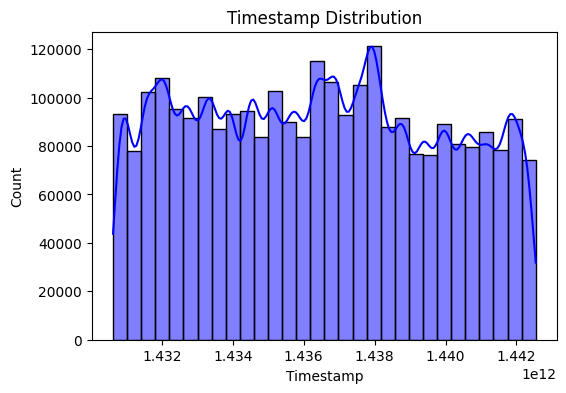

In [ ]:
# Numeric Columns
plt.figure(figsize=(6,4))
sns.histplot(events['timestamp'], bins=30, kde=True, color='blue')
plt.title("Timestamp Distribution")
plt.xlabel("Timestamp")
plt.ylabel("Count")
plt.show()

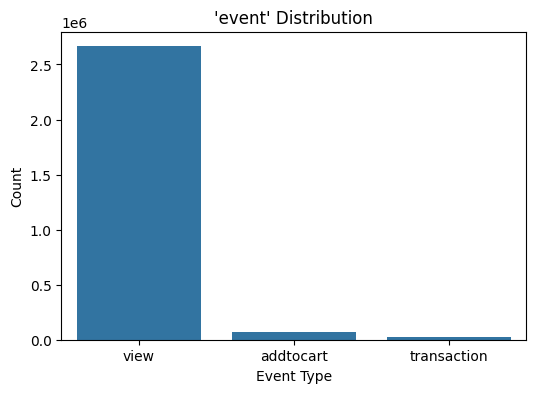

In [ ]:
# Categorical Column (event)
plt.figure(figsize=(6,4))
sns.countplot(x='event', data=events)
plt.title("'event' Distribution")
plt.xlabel("Event Type")
plt.ylabel("Count")
plt.show()

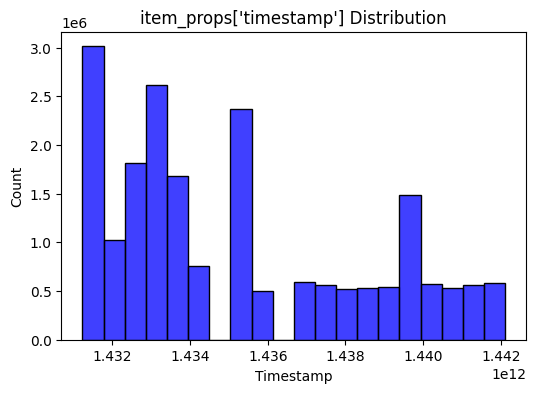

In [ ]:
# Numeric Columns
plt.figure(figsize=(6,4))
sns.histplot(item_props['timestamp'], bins=20, kde=False, color='blue')
plt.title("item_props['timestamp'] Distribution")
plt.xlabel("Timestamp")
plt.ylabel("Count")
plt.show()

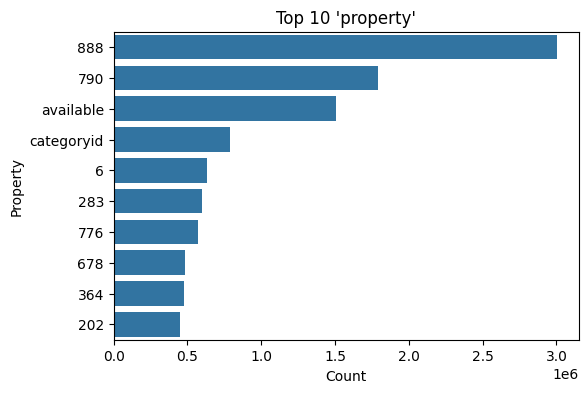

In [ ]:
# Categorical Columns:
plt.figure(figsize=(6,4))
top_10_properties = item_props['property'].value_counts().head(10)
sns.barplot(x=top_10_properties.values, y=top_10_properties.index, orient='h')
plt.title("Top 10 'property'")
plt.xlabel("Count")
plt.ylabel("Property")
plt.show()

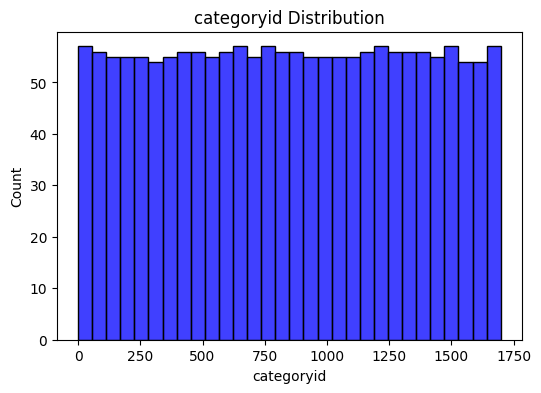

In [ ]:
# Numeric Columns
plt.figure(figsize=(6,4))
sns.histplot(category_tree['categoryid'], bins=30, color='blue')
plt.title("categoryid Distribution")
plt.xlabel("categoryid")
plt.ylabel("Count")
plt.show()

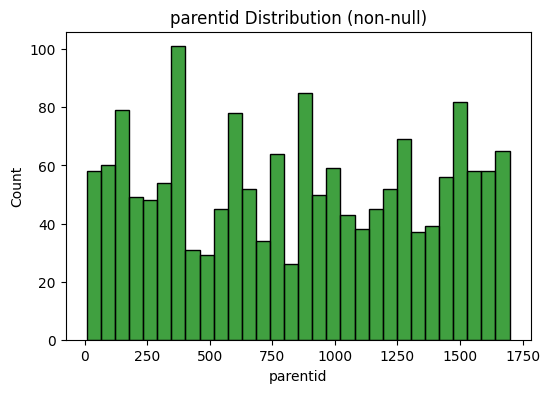

In [ ]:
# Because parentid can be NaN or repeated, let's only plot non-null
df_parentid = category_tree[category_tree['parentid'].notna()].copy()
plt.figure(figsize=(6,4))
sns.histplot(df_parentid['parentid'], bins=30, color='green')
plt.title("parentid Distribution (non-null)")
plt.xlabel("parentid")
plt.ylabel("Count")
plt.show()

Bivariate Analysis

Events Dataset

In [ ]:
# event vs. transactionid
df_has_transactionid = events[events['transactionid'].notna()].copy()
if not df_has_transactionid.empty:
    # Count how many transactionids appear for each event type
    transid_counts = df_has_transactionid.groupby('event')['transactionid'].nunique()
    print("Unique transactionid per event")
    print(transid_counts)
    print()
else:
    print("No rows with non-null transactionid in 'events' for bivariate analysis.\n")

Unique transactionid per event
event
transaction    17672
Name: transactionid, dtype: int64



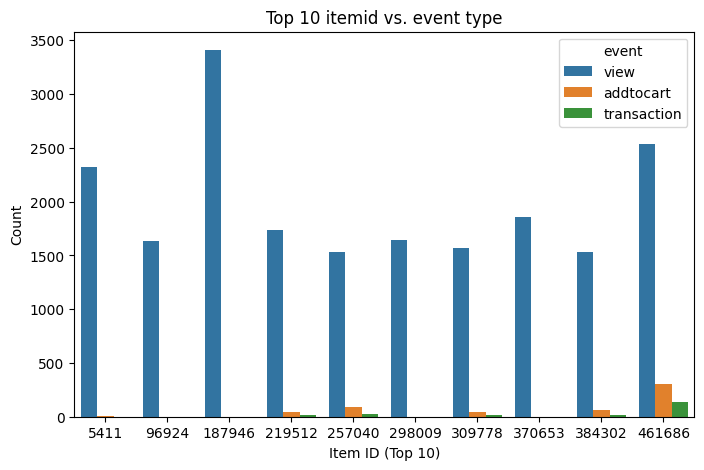

In [ ]:
# itemid vs. event (top items only)
top_items = events['itemid'].value_counts().head(10).index
df_top_items = events[events['itemid'].isin(top_items)]
plt.figure(figsize=(8,5))
sns.countplot(x='itemid', hue='event', data=df_top_items)
plt.title("Top 10 itemid vs. event type")
plt.xlabel("Item ID (Top 10)")
plt.ylabel("Count")
plt.show()

Item Properties Dataset

In [ ]:
# property vs. timestamp
# We'll see how many times each property appears at each snapshot
prop_vs_ts = item_props.groupby(['timestamp','property']).size().reset_index(name='count')
# Show top 10 combinations by count
top_10_prop_ts = prop_vs_ts.nlargest(10, 'count')
print("Top 10 (timestamp, property) combos by frequency")
print(top_10_prop_ts)


Top 10 (timestamp, property) combos by frequency
         timestamp    property   count
402  1431226800000         888  277369
362  1431226800000         790  240223
457  1431226800000   available  232060
458  1431226800000  categoryid  214522
130  1431226800000         283  208185
171  1431226800000         364  205376
306  1431226800000         678  205070
48   1431226800000         112  203355
346  1431226800000         764  203261
280  1431226800000           6  203256


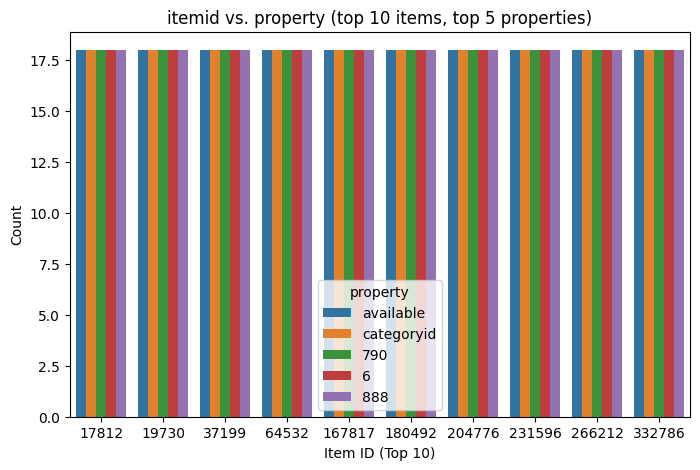

In [ ]:
# property vs. itemid
# We'll show distribution for top 5 properties among top 10 items
top_5_properties = item_props['property'].value_counts().head(5).index
df_bi_prop = item_props[item_props['property'].isin(top_5_properties)]
top_10_items = df_bi_prop['itemid'].value_counts().head(10).index
df_bi_prop = df_bi_prop[df_bi_prop['itemid'].isin(top_10_items)]
plt.figure(figsize=(8,5))
sns.countplot(x='itemid', hue='property', data=df_bi_prop)
plt.title("itemid vs. property (top 10 items, top 5 properties)")
plt.xlabel("Item ID (Top 10)")
plt.ylabel("Count")
plt.show()


Category Tree Dataset

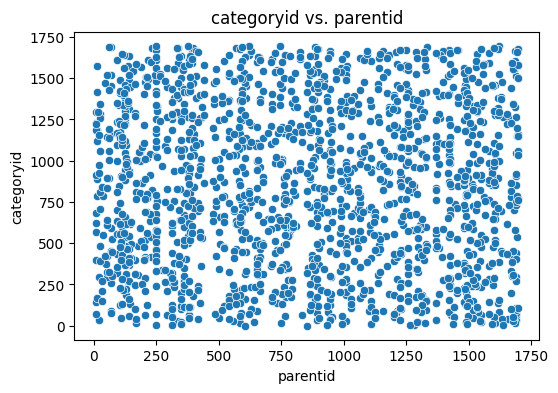

In [ ]:
# categoryid vs. parentid
# We'll make a scatter plot as many parentids may be repeated, it's not super informative, but can show some pattern.

plt.figure(figsize=(6,4))
sns.scatterplot(x='parentid', y='categoryid', data=df_parentid)
plt.title("categoryid vs. parentid")
plt.xlabel("parentid")
plt.ylabel("categoryid")
plt.show()


Multivariate Analysis

Events Dataset

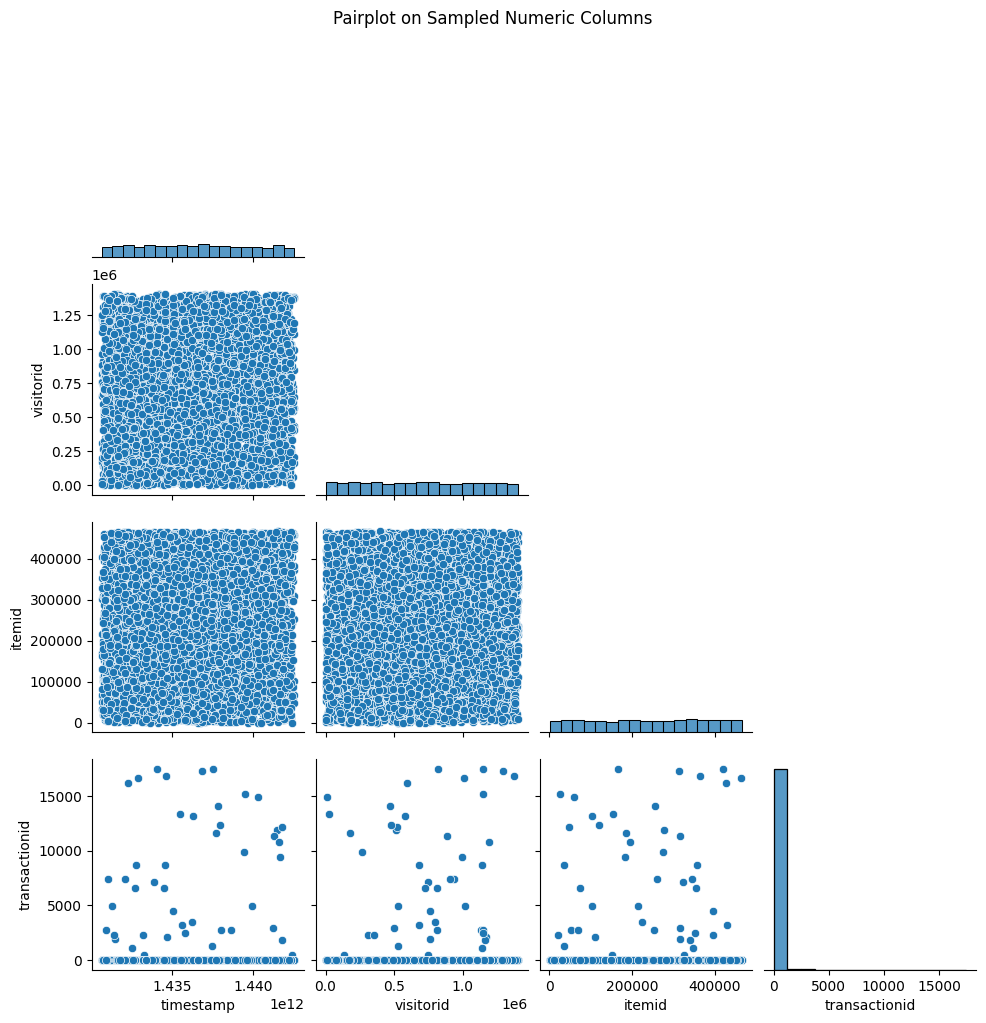

In [ ]:
# Because most columns are IDs or strings, pairplots/correlation matrices
# are less meaningful. We'll demonstrate a pairplot on numeric columns
# (timestamp, visitorid, itemid, transactionid) using a small sample.

sample_size = 5000
df_sample = events.sample(sample_size, random_state=42).copy()

# Convert any NaNs in transactionid to 0 or -1 for pairplot
df_sample['transactionid'] = df_sample['transactionid'].fillna(-1)

sns.pairplot(df_sample, vars=['timestamp','visitorid','itemid','transactionid'], corner=True)
plt.suptitle("Pairplot on Sampled Numeric Columns", y=1.02)
plt.show()

Item Properties Dataset

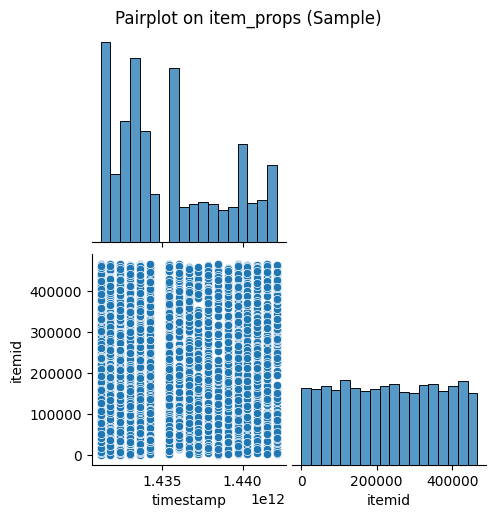

In [ ]:
# Because 'value' can be multi-token and property is hashed, we have limited numeric columns for a pairplot.
# We'll do a pairplot on [timestamp, itemid] using a small sample.

sample_size = 5000
df_ip_sample = item_props.sample(sample_size, random_state=42).copy()

sns.pairplot(df_ip_sample, vars=['timestamp','itemid'], corner=True)
plt.suptitle("Pairplot on item_props (Sample)", y=1.02)
plt.show()

## 3. DATA PRE PROCESSING


In [ ]:
import numpy as np
import pickle
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

# Copy the DataFrame
df = events.copy()

# Create a binary target if not present
df['target'] = df['event'].apply(lambda x: 1 if x in ['addtocart','transaction'] else 0)

# Compute user_event_count_dict & item_event_count_dict
user_event_count_series = df.groupby('visitorid')['event'].count()  # total events per user
item_event_count_series = df.groupby('itemid')['event'].count()     # total events per item

user_event_count_dict = user_event_count_series.to_dict()
item_event_count_dict = item_event_count_series.to_dict()

# item_available_dict = 1 for all items, or from item_props
item_available_dict = {}
for item_id in df['itemid'].unique():
    item_available_dict[item_id] = 1  # or 0 if not available

# Scale user_event_count & item_event_count using MinMaxScaler
user_ids_arr = list(user_event_count_dict.keys())
user_counts_arr = np.array(list(user_event_count_dict.values()), dtype=float)
item_ids_arr = list(item_event_count_dict.keys())
item_counts_arr = np.array(list(item_event_count_dict.values()), dtype=float)

scaler = MinMaxScaler()
user_counts_scaled = scaler.fit_transform(user_counts_arr.reshape(-1,1)).ravel()
item_counts_scaled = scaler.fit_transform(item_counts_arr.reshape(-1,1)).ravel()

# Update dictionaries with scaled values
for i, uid in enumerate(user_ids_arr):
    user_event_count_dict[uid] = user_counts_scaled[i]
for i, iid in enumerate(item_ids_arr):
    item_event_count_dict[iid] = item_counts_scaled[i]

# Label Encode visitorid & itemid
visitor_encoder = LabelEncoder()
item_encoder = LabelEncoder()
df['visitor_enc'] = visitor_encoder.fit_transform(df['visitorid'])
df['item_enc']    = item_encoder.fit_transform(df['itemid'])

# Build wide features
def build_wide_features(row):
    u_count = user_event_count_dict.get(row['visitorid'], 0.0)
    i_count = item_event_count_dict.get(row['itemid'], 0.0)
    avail   = item_available_dict.get(row['itemid'], 0)
    return [u_count, i_count, avail]

df['wide'] = df.apply(build_wide_features, axis=1)
wide_features = np.vstack(df['wide'].values)  # shape: (num_samples, 3)

# Deep features: [visitor_enc, item_enc]
deep_features = df[['visitor_enc','item_enc']].values

# Labels
labels = df['target'].values

# Train/Validation Split
(
    wide_features_train,
    wide_features_val,
    deep_features_train,
    deep_features_val,
    y_train,
    y_val
) = train_test_split(
    wide_features,
    deep_features,
    labels,
    test_size=0.2,
    random_state=42
)

print("Preprocessing done. Shapes:")
print(" wide_features:", wide_features.shape)
print(" deep_features:", deep_features.shape)
print(" labels:", labels.shape)

# Dump dictionaries & encoders for future usage
with open('wide_features_dicts.pkl', 'wb') as f:
    pickle.dump({
        'user_event_count_dict': user_event_count_dict,
        'item_event_count_dict': item_event_count_dict,
        'item_available_dict': item_available_dict
    }, f)

with open('visitor_encoder.pkl', 'wb') as f:
    pickle.dump(visitor_encoder, f)
with open('item_encoder.pkl', 'wb') as f:
    pickle.dump(item_encoder, f)

print("Dictionaries & encoders saved.")

Preprocessing done. Shapes:
 wide_features: (2756101, 3)
 deep_features: (2756101, 2)
 labels: (2756101,)
Dictionaries & encoders saved.


## 4. CUSTOM CALLBACK FUNCTION
Callbacks automate aspects of training management, from early stopping to saving best models and adjusting the learning rate.

In [ ]:
import tensorflow as tf
# EarlyStopping
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',        # Metric to be monitored
    patience=5,                # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True, # Restore model weights from the epoch with the best value of the monitored metric
    min_delta=0.0,             # Minimum change in the monitored metric to qualify as an improvement
    mode='auto',
    verbose=1
)

# ModelCheckpoint
model_ckpt = tf.keras.callbacks.ModelCheckpoint(
    filepath='best_model.keras',  # Filepath to save the model file
    monitor='val_loss',        # Metric to be monitored
    save_best_only=True,       # Only the best model (according to 'monitor') is saved
    save_weights_only=False,   # Save the entire model not just weights
    mode='auto',
    verbose=1
)

# ReduceLROnPlateau
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',        # Metric to be monitored
    factor=0.5,                # Factor by which the learning rate will be reduced (new_lr = lr * factor)
    patience=1,                # Number of epochs with no improvement after which learning rate will be reduced
    min_lr=1e-6,               # Lower bound on the learning rate
    mode='auto',
    cooldown=0,                # Number of epochs to wait before resuming normal operation after LR has been reduced
    verbose=1
)

# Combine them into a list
callbacks = [early_stop, model_ckpt, reduce_lr]

## 5. MODEL DEFINITION
* Define Key Variables
* `wide_dim:` number of numeric features in the wide branch (e.g., 3).
* `max_visitor_id` & `max_item_id:` cardinalities for embedding layers.
embedding_dim: size of each embedding vector (e.g., 8).

In [ ]:
wide_dim = 3        # e.g., user_event_count, item_event_count, available
max_visitor_id = 1000
max_item_id = 2000
embedding_dim = 8

#### Define Wide & Deep Inputs
* `wide_input:` shape `(wide_dim,)`, e.g., numeric features like user counts, item counts, availability.
* `deep_input:` shape `(2,)`, representing [`visitor_enc`, `item_enc`] IDs for embeddings.

In [ ]:
from tensorflow.keras.layers import Input, Dense, Embedding, Flatten, Concatenate, Dropout, Add
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model

wide_input = Input(shape=(wide_dim,), name="wide_input")
deep_input = Input(shape=(2,), name="deep_input")

#### Split Deep Input for Embeddings
- We separate deep_input into two slices: visitor_ids and item_ids. Each will go to a separate embedding layer.

In [ ]:
visitor_ids = deep_input[:, 0]
item_ids = deep_input[:, 1]


#### Define Embedding Layers
- **`visitor_embed` & `item_embed`**:
  - Convert integer IDs into embedding vectors of size `embedding_dim`.
  - `input_dim` = maximum ID + 1 for each entity (visitor or item).

In [ ]:
visitor_embed = Embedding(
    input_dim=max_visitor_id,
    output_dim=embedding_dim,
    name="visitor_embedding"
)(visitor_ids)

item_embed = Embedding(
    input_dim=max_item_id,
    output_dim=embedding_dim,
    name="item_embedding"
)(item_ids)

#### Flatten Embeddings
- **Flatten** each embedding from `(batch_size, 1, embedding_dim)` to `(batch_size embedding_dim)`.
- Required because subsequent layers expect a 2D tensor.

In [ ]:
visitor_flat = Flatten()(visitor_embed)
item_flat = Flatten()(item_embed)

#### Concatenate Embeddings
- We concatenate the user and item embeddings along the last dimension, forming a single vector of shape `(batch_size, embedding_dim * 2)`.

In [ ]:
deep_concat = Concatenate(name="deep_concat")([visitor_flat, item_flat])


#### Add Dense Layers with Dropout in Deep Branch¶
- **Dense Layers:** 64 → 32 neurons, each ReLU activated.
- **Dropout(0.3):** 30% of neurons are randomly dropped after each dense layer, helping reduce overfitting.
- **deep_output:** A single-neuron (sigmoid) output from the deep branch.


In [ ]:
deep_dense1 = Dense(64, activation="relu", name="deep_dense1")(deep_concat)
drop1 = Dropout(0.3, name="dropout1")(deep_dense1)  # 30% dropout
deep_dense2 = Dense(32, activation="relu", name="deep_dense2")(drop1)
drop2 = Dropout(0.3, name="dropout2")(deep_dense2)
deep_output = Dense(1, activation="sigmoid", name="deep_output")(drop2)

#### Define the Wide Branch
- A **simple dense layer** on the wide input.
- Typically no dropout in the wide branch, as it’s used for memorization.

In [ ]:
wide_output = Dense(1, activation="sigmoid", name="wide_output")(wide_input)


#### Combine Wide & Deep, Build & Compile
- **Add**: We sum the wide output and deep output.
- **final_output**: Another single-neuron (sigmoid) layer for the final prediction.
- **Compile**: Using `"adam"` optimizer, `"binary_crossentropy"` loss for binary classification, and `"accuracy"` as a metric.


In [ ]:
combined = Add(name="wide_deep_merge")([wide_output, deep_output])
final_output = Dense(1, activation="sigmoid", name="final_output")(combined)

model = Model(inputs=[wide_input, deep_input], outputs=final_output)
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ deep_input          │ (None, 2)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item (GetItem)  │ (None)            │          0 │ deep_input[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_1          │ (None)            │          0 │ deep_input[0][0]  │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ visitor_embedding   │ (None, 8)         │      8,000 │ get_item[0][0]    │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ item_embedding      │ (None, 8)         │     16,000 │ get_item_1[0][0]  │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 8)         │          0 │ visitor_embeddin… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 8)         │          0 │ item_embedding[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ deep_concat         │ (None, 16)        │          0 │ flatten[0][0],    │
│ (Concatenate)       │                   │            │ flatten_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ deep_dense1 (Dense) │ (None, 64)        │      1,088 │ deep_concat[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout1 (Dropout)  │ (None, 64)        │          0 │ deep_dense1[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ deep_dense2 (Dense) │ (None, 32)        │      2,080 │ dropout1[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ wide_input          │ (None, 3)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout2 (Dropout)  │ (None, 32)        │          0 │ deep_dense2[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ wide_output (Dense) │ (None, 1)         │          4 │ wide_input[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ deep_output (Dense) │ (None, 1)         │         33 │ dropout2[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ wide_deep_merge     │ (None, 1)         │          0 │ wide_output[0][0… │
│ (Add)               │                   │            │ deep_output[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ final_output        │ (None, 1)         │          2 │ wide_deep_merge[… │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 27,207 (106.28 KB)

 Trainable params: 27,207 (106.28 KB)

 Non-trainable params: 0 (0.00 B)

#### Plot the Model Graph
- plot_model: Creates a PNG diagram of the network architecture.

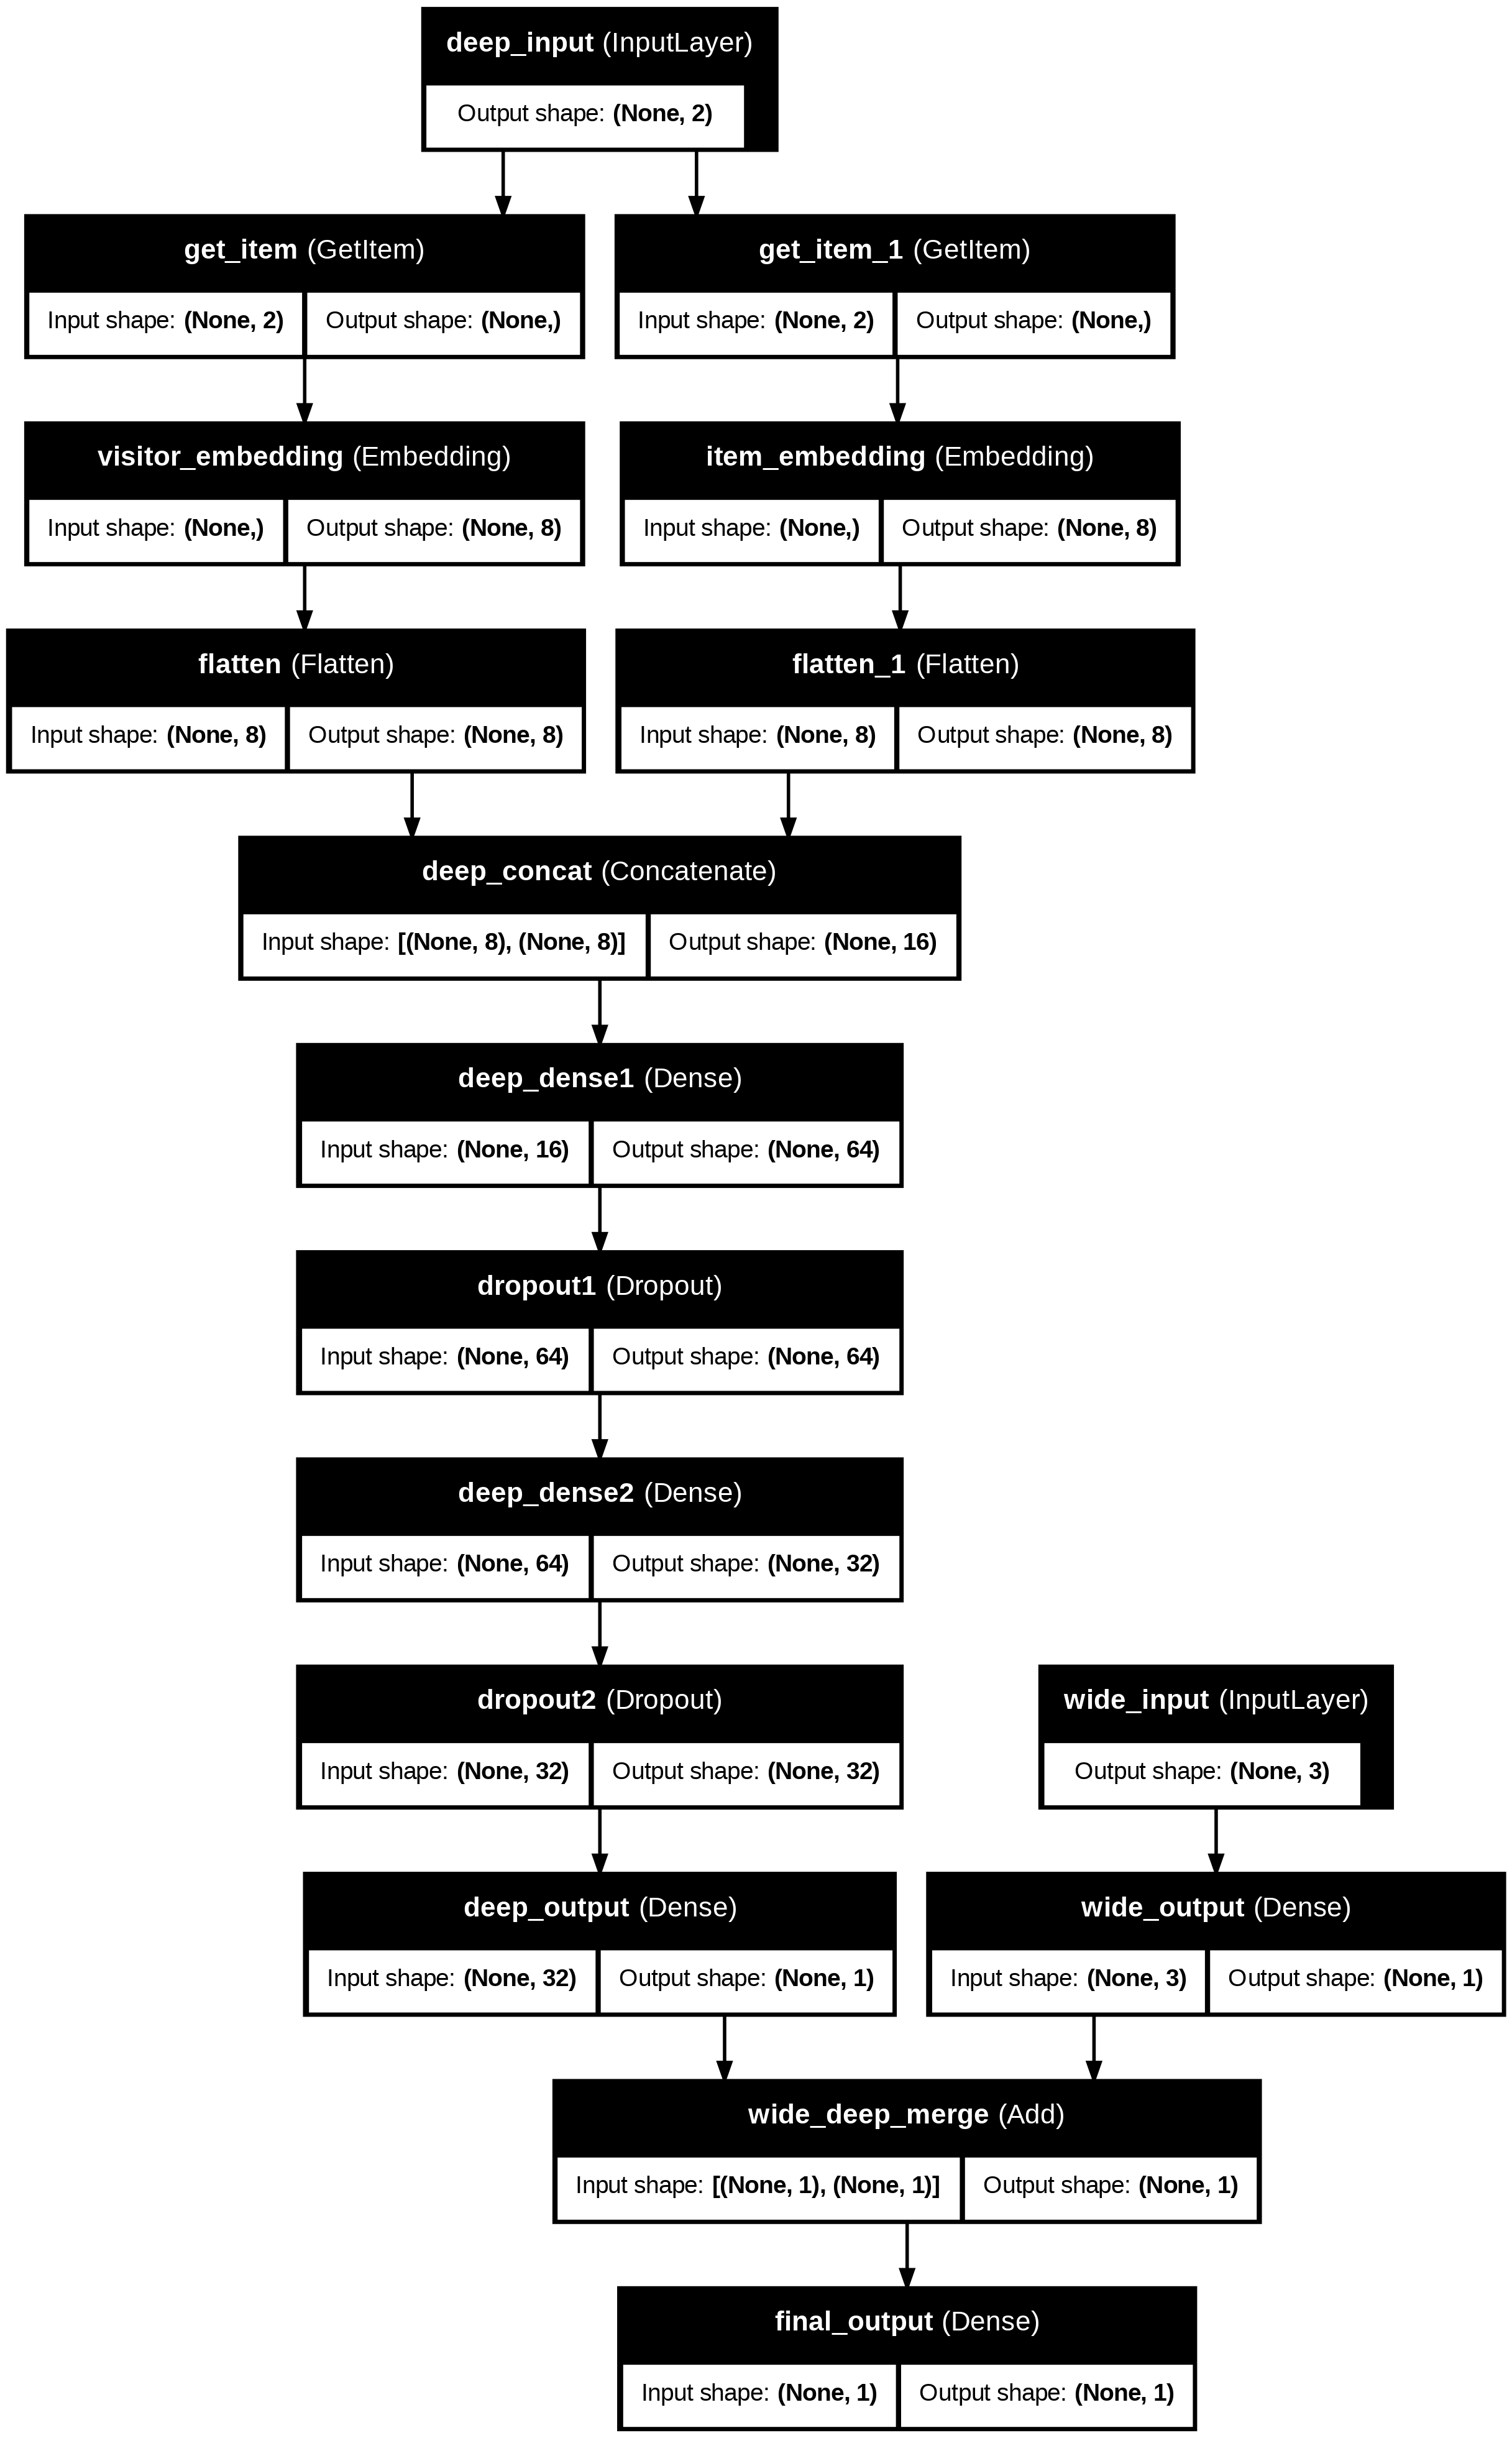

In [ ]:
from IPython.display import Image

plot_model(
    model,
    to_file="wide_deep_dropout_model.png",
    show_shapes=True,
    show_layer_names=True,
    rankdir="TB"
)

Image("wide_deep_dropout_model.png")

#### 6. MODEL TRAINING


In [42]:
history = model.fit(
    x=[wide_features_train, deep_features_train],
    y=y_train,
    validation_data=([wide_features_val, deep_features_val], y_val),
    epochs=500,
    batch_size=512,
    callbacks=callbacks,
    verbose=1
)

Epoch 1/500
4307/4307 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9667 - loss: 0.1999
Epoch 1: val_loss improved from inf to 0.14624, saving model to best_model.keras
4307/4307 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.9667 - loss: 0.1999 - val_accuracy: 0.9665 - val_loss: 0.1462 - learning_rate: 0.0010
Epoch 2/500
4303/4307 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9669 - loss: 0.1447
Epoch 2: val_loss improved from 0.14624 to 0.14512, saving model to best_model.keras
4307/4307 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9669 - loss: 0.1447 - val_accuracy: 0.9665 - val_loss: 0.1451 - learning_rate: 0.0010
Epoch 3/500
4285/4307 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9667 - loss: 0.1444
Epoch 3: val_loss improved from 0.14512 to 0.14445, saving model to best_model.keras
4307/4307 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9667 - loss: 0.1444 - val_accuracy: 0.9665 - val_loss: 0.1445 - learning_rate: 0.0010
Epoch 4/500
4302/4307 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/

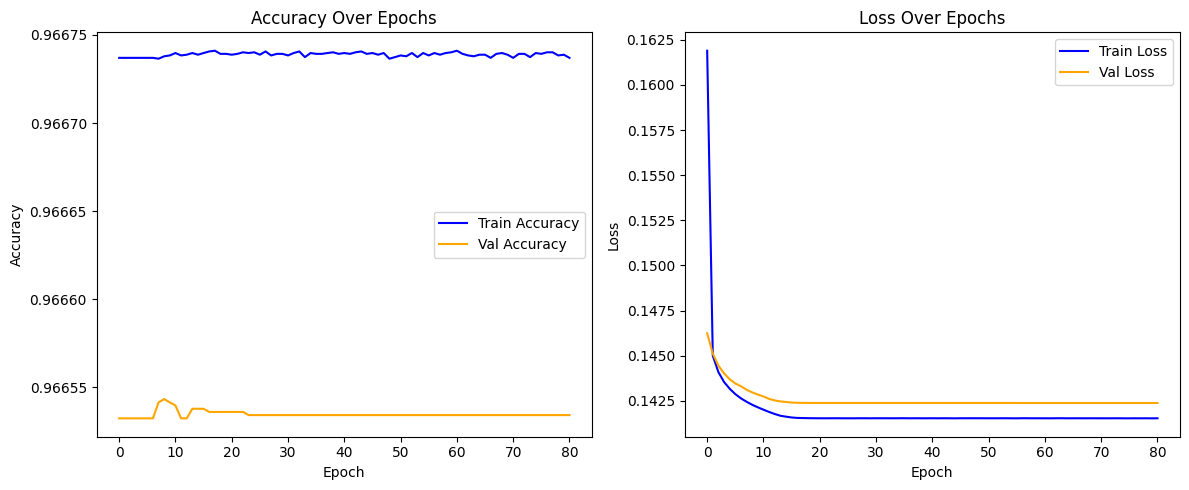

In [43]:
# 1) Create a figure
plt.figure(figsize=(12,5))

# 2) Plot Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Val Accuracy', color='orange')
plt.title("Accuracy Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# 3) Plot Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss', color='blue')
plt.plot(history.history['val_loss'], label='Val Loss', color='orange')
plt.title("Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

# 4) Show the plots
plt.tight_layout()
plt.show()

#### 7. LOAD THE BEST MODEL & MAKE PREDICTIONS
We load the best_model.keras file, generate predictions on the validation set, and print a confusion matrix plus classification report.



In [44]:
best_model = tf.keras.models.load_model('best_model.keras')

# Suppose we have wide_features_val, deep_features_val, y_val
val_probs = best_model.predict([wide_features_val, deep_features_val]).ravel()
val_preds = (val_probs > 0.5).astype(int)

from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_val, val_preds)
print("Confusion Matrix:\n", cm)

print("\nClassification Report:")
print(classification_report(y_val, val_preds))


17226/17226 ━━━━━━━━━━━━━━━━━━━━ 24s 1ms/step
Confusion Matrix:
 [[532767      6]
 [ 18441      7]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98    532773
           1       0.54      0.00      0.00     18448

    accuracy                           0.97    551221
   macro avg       0.75      0.50      0.49    551221
weighted avg       0.95      0.97      0.95    551221



#### 8. RECOMMENDATION GENERATION


In [45]:
# Load dictionaries & encoders again (in practice, you'd do this in a new session)
with open('wide_features_dicts.pkl', 'rb') as f:
    dicts = pickle.load(f)
user_event_count_dict = dicts['user_event_count_dict']
item_event_count_dict = dicts['item_event_count_dict']
item_available_dict   = dicts['item_available_dict']

with open('visitor_encoder.pkl', 'rb') as f:
    visitor_encoder_loaded = pickle.load(f)
with open('item_encoder.pkl', 'rb') as f:
    item_encoder_loaded = pickle.load(f)

def build_arrays_for_recs(user_id, candidate_items):
    wide_list = []
    deep_list = []

    # Encode user
    if user_id in visitor_encoder_loaded.classes_:
        user_enc = visitor_encoder_loaded.transform([user_id])[0]
    else:
        user_enc = len(visitor_encoder_loaded.classes_)  # fallback

    for item_id in candidate_items:
        # Deep
        if item_id in item_encoder_loaded.classes_:
            item_enc = item_encoder_loaded.transform([item_id])[0]
        else:
            item_enc = len(item_encoder_loaded.classes_)  # fallback

        deep_list.append([user_enc, item_enc])

        # Wide
        u_count = user_event_count_dict.get(user_id, 0.0)
        i_count = item_event_count_dict.get(item_id, 0.0)
        avail   = item_available_dict.get(item_id, 0)
        wide_list.append([u_count, i_count, avail])

    wide_array = np.array(wide_list, dtype=np.float32)
    deep_array = np.array(deep_list, dtype=np.float32)
    return wide_array, deep_array

def get_5_recommendations(user_id, candidate_items):
    wide_array, deep_array = build_arrays_for_recs(user_id, candidate_items)
    pred_probs = best_model.predict([wide_array, deep_array]).ravel()
    sorted_indices = np.argsort(-pred_probs)
    top_5_indices = sorted_indices[:5]
    top_5_items = [candidate_items[i] for i in top_5_indices]
    top_5_probs = pred_probs[top_5_indices]
    return list(zip(top_5_items, top_5_probs))

# EXAMPLE USAGE
user_id_example = 100
candidate_items_example = [1010, 2020, 3030, 4040, 5050, 6060]

recommendations = get_5_recommendations(user_id_example, candidate_items_example)
print("Top 5 Recommendations for user=100:")
for item_id, prob in recommendations:
    print(f"Item {item_id}, Probability={prob:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 566ms/step
Top 5 Recommendations for user=100:
Item 1010, Probability=0.0402
Item 5050, Probability=0.0402
Item 6060, Probability=0.0402
Item 2020, Probability=0.0265
Item 4040, Probability=0.0265
